<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment7April9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disease Prediction Using Machine Learning
aims to implement a robust machine-learning model that can efficiently predict the disease of a human, based on the symptoms that he/she possesses. Let us look into how we can approach this machine-learning problem:

Data preparation is the primary step for any machine learning problem. We will be using a dataset from Kaggle for this problem. This dataset consists of two CSV files one for training and one for testing. There is a total of 133 columns in the dataset out of which 132 columns represent the symptoms and the last column is the prognosis.
Cleaning is the most important step in a machine learning project. The quality of our data determines the quality of our machine-learning model. So it is always necessary to clean the data before feeding it to the model for training. In our dataset all the columns are numerical, the target column i.e. prognosis is a string type and is encoded to numerical form using a label encoder.
After gathering and cleaning the data, the data is ready and can be used to train a machine learning model. We will be using this cleaned data to train the Support Vector Classifier, Naive Bayes Classifier, and Random Forest Classifier. We will be using a confusion matrix to determine the quality of the models.
After training the three models we will be predicting the disease for the input symptoms by combining the predictions of all three models. This makes our overall prediction more robust and accurate.

In [327]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [328]:
#Reading the training data from the csv file
disease=pd.read_csv('Training.csv')
disease

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [329]:
#Checking for null values in the training data
disease.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [330]:
#Number of columns present in the training dataset
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [331]:
#Dropping the columns with null values
disease=disease.drop('Unnamed: 133',axis=1)

In [332]:
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [333]:
#Encoding the data of the target variable
encoder=LabelEncoder()
disease['prognosis']=encoder.fit_transform(disease['prognosis'])

In [334]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


<Axes: xlabel='itching', ylabel='Count'>

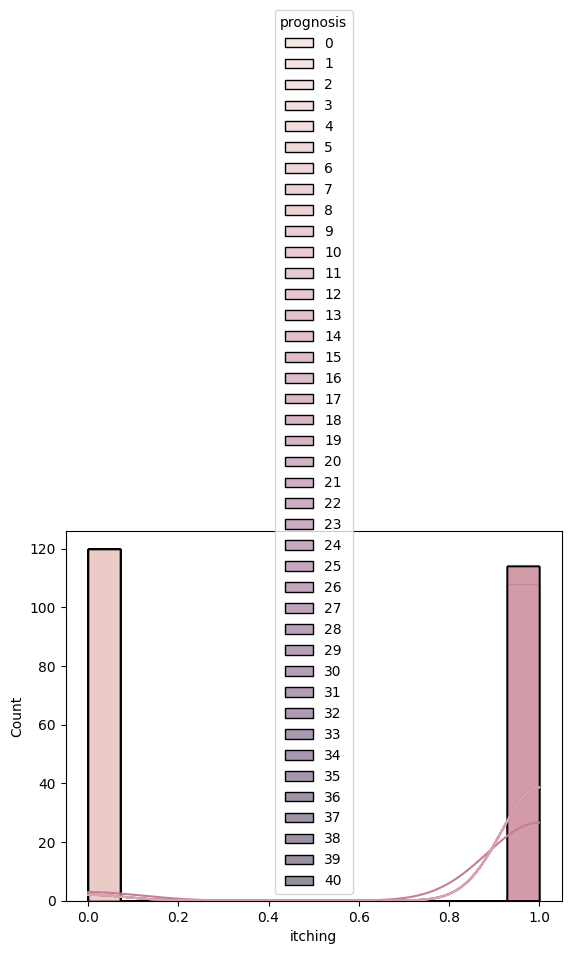

In [335]:
#Plotting graphs of certain features present in the training data
sns.histplot(data=disease,x='itching',hue='prognosis',kde=True)

<Axes: xlabel='skin_rash', ylabel='Count'>

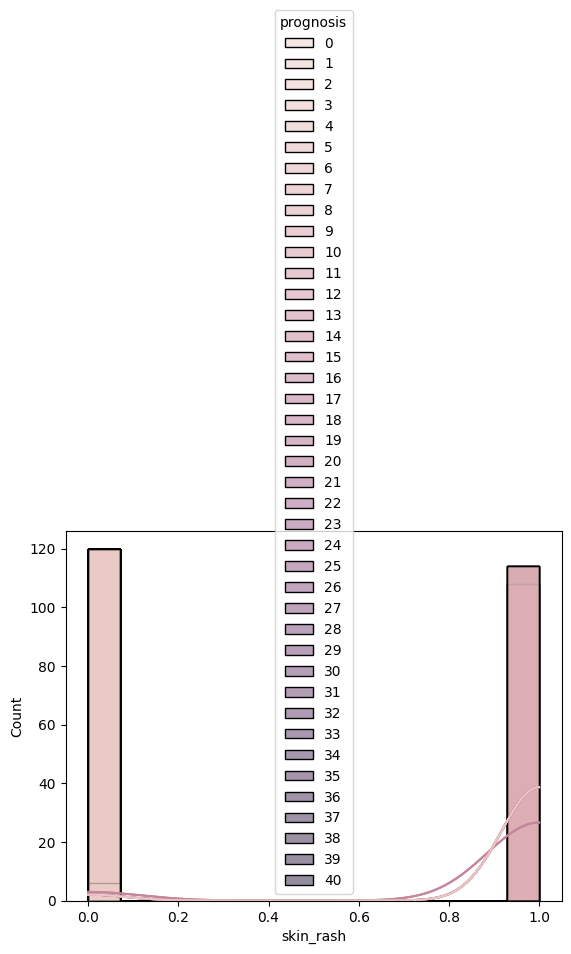

In [336]:
sns.histplot(data=disease,x='skin_rash',hue='prognosis',kde=True)

<Axes: xlabel='itching', ylabel='count'>

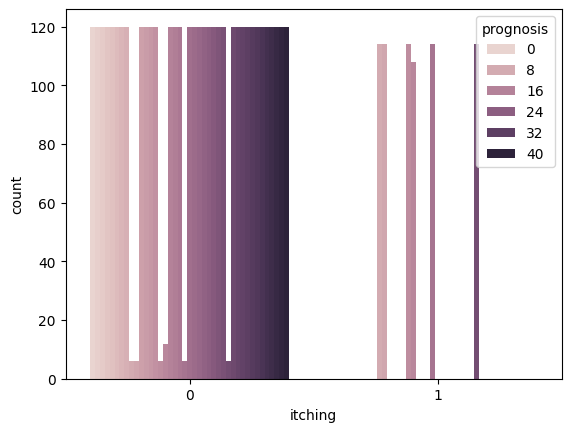

In [337]:
sns.countplot(data=disease,x='itching',hue='prognosis')

<Axes: xlabel='itching', ylabel='prognosis'>

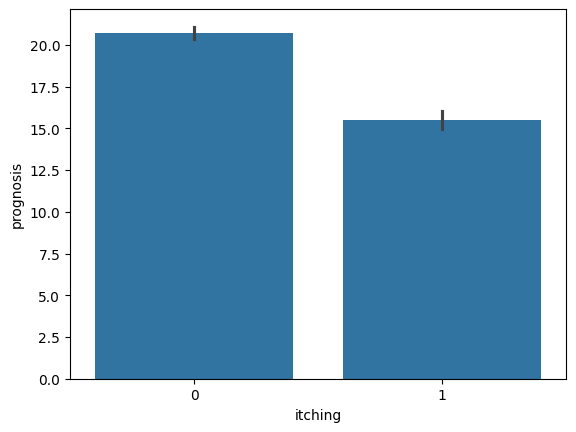

In [338]:
sns.barplot(x=disease['itching'],y=disease['prognosis'])

<Axes: xlabel='skin_rash', ylabel='prognosis'>

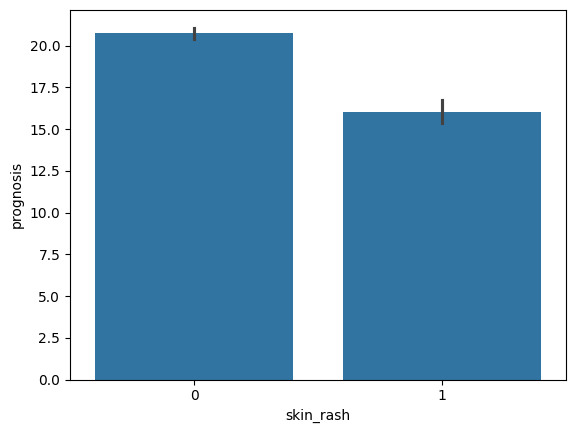

In [339]:
sns.barplot(x=disease['skin_rash'],y=disease['prognosis'])

<Axes: xlabel='nodal_skin_eruptions', ylabel='prognosis'>

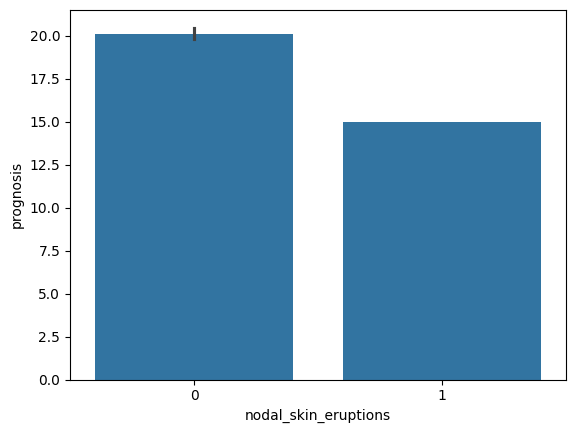

In [340]:
sns.barplot(x=disease['nodal_skin_eruptions'],y=disease['prognosis'])

<Axes: xlabel='continuous_sneezing', ylabel='prognosis'>

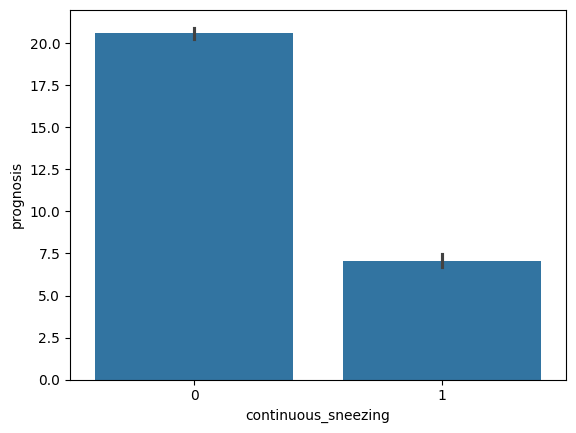

In [341]:
sns.barplot(x=disease['continuous_sneezing'],y=disease['prognosis'])

<Axes: xlabel='shivering', ylabel='prognosis'>

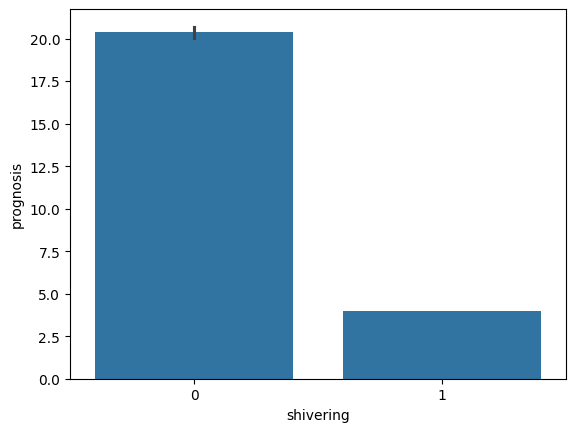

In [342]:
sns.barplot(x=disease['shivering'],y=disease['prognosis'])

<Axes: xlabel='chills', ylabel='prognosis'>

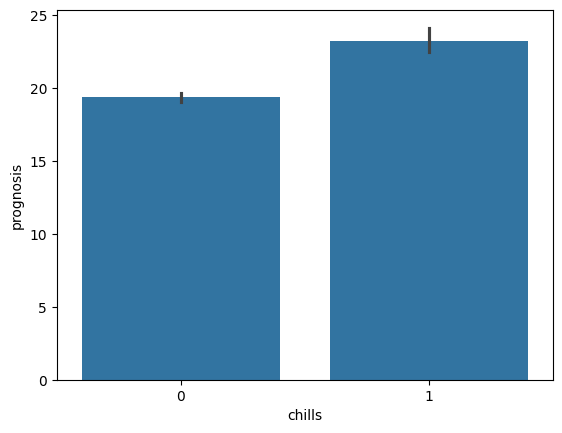

In [343]:
sns.barplot(x=disease['chills'],y=disease['prognosis'])

<Axes: xlabel='joint_pain', ylabel='prognosis'>

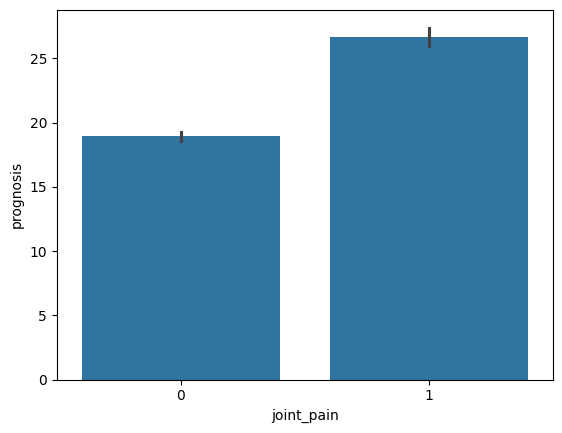

In [344]:
sns.barplot(x=disease['joint_pain'],y=disease['prognosis'])

<Axes: xlabel='stomach_pain', ylabel='prognosis'>

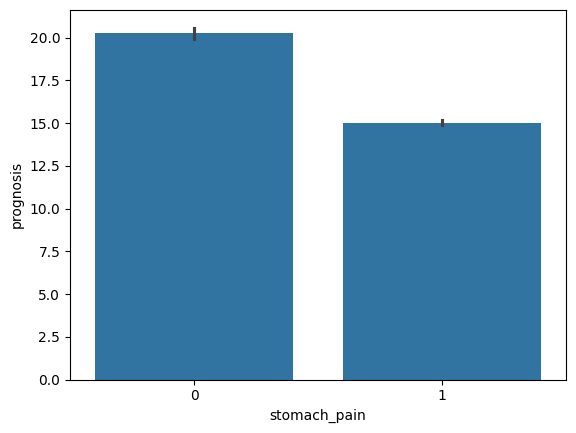

In [345]:
sns.barplot(x=disease['stomach_pain'],y=disease['prognosis'])

<Axes: xlabel='ulcers_on_tongue', ylabel='prognosis'>

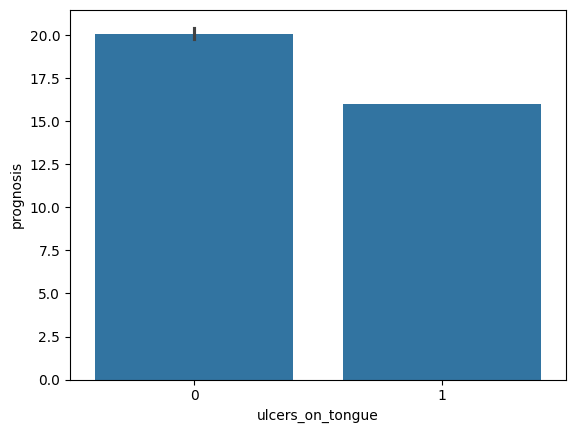

In [346]:
sns.barplot(x=disease['ulcers_on_tongue'],y=disease['prognosis'])

<Axes: xlabel='acidity', ylabel='prognosis'>

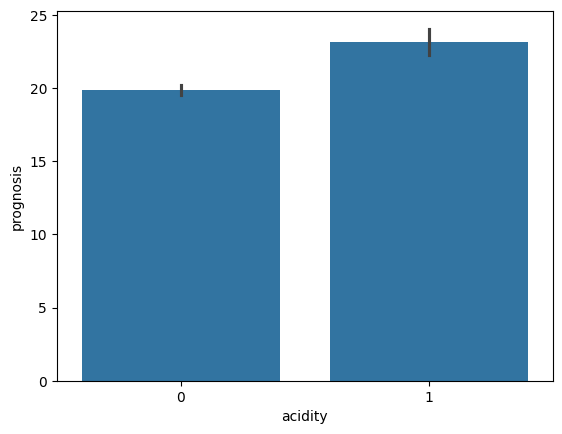

In [347]:
sns.barplot(x=disease['acidity'],y=disease['prognosis'])

<Axes: xlabel='blackheads', ylabel='prognosis'>

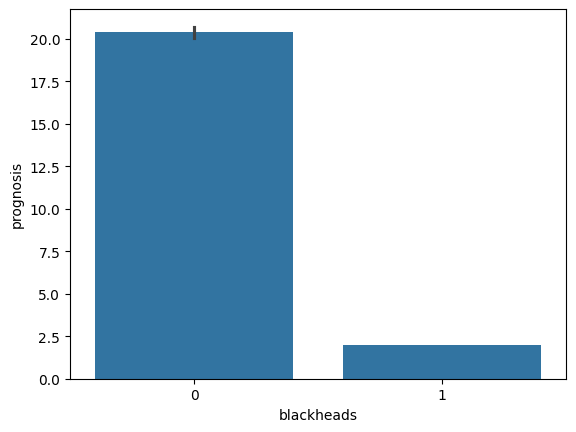

In [348]:
sns.barplot(x=disease['blackheads'],y=disease['prognosis'])

<Axes: xlabel='scurring', ylabel='prognosis'>

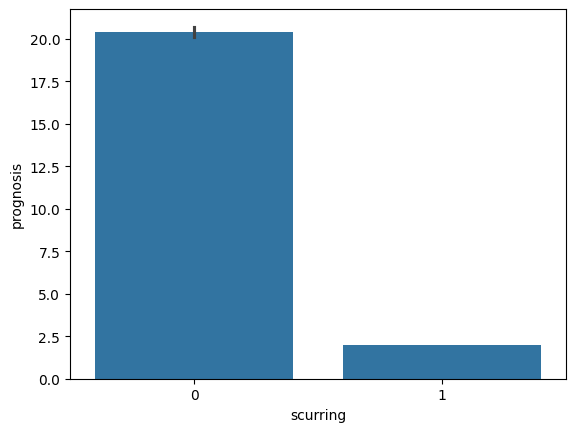

In [349]:
sns.barplot(x=disease['scurring'],y=disease['prognosis'])

<Axes: xlabel='skin_peeling', ylabel='prognosis'>

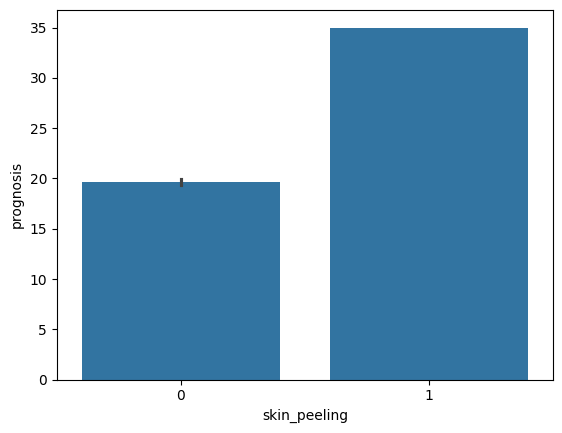

In [350]:
sns.barplot(x=disease['skin_peeling'],y=disease['prognosis'])

<Axes: xlabel='silver_like_dusting', ylabel='prognosis'>

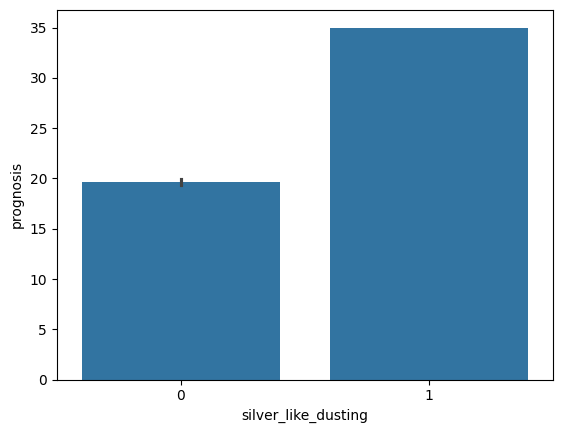

In [351]:
sns.barplot(x=disease['silver_like_dusting'],y=disease['prognosis'])

<Axes: xlabel='small_dents_in_nails', ylabel='prognosis'>

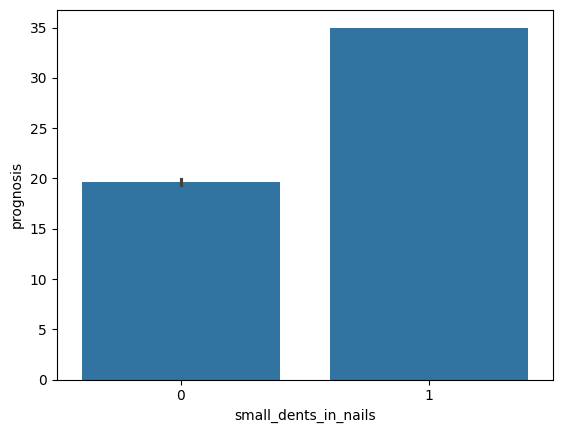

In [352]:
sns.barplot(x=disease['small_dents_in_nails'],y=disease['prognosis'])

<Axes: xlabel='blister', ylabel='prognosis'>

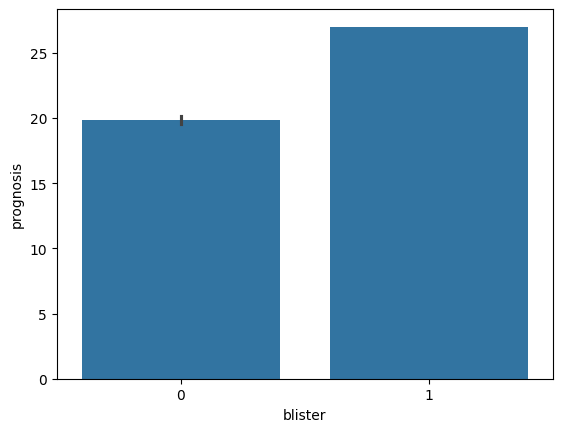

In [353]:
sns.barplot(x=disease['blister'],y=disease['prognosis'])

<Axes: xlabel='red_sore_around_nose', ylabel='prognosis'>

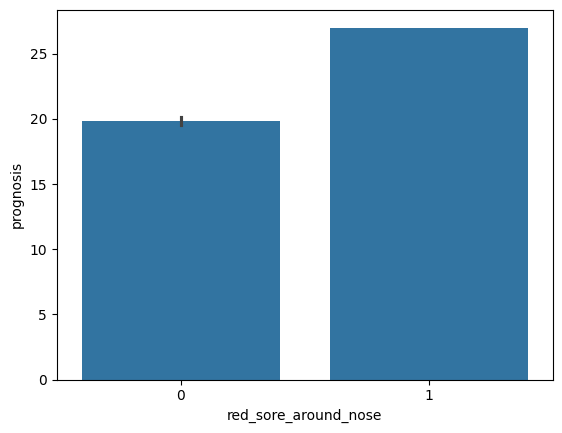

In [354]:
sns.barplot(x=disease['red_sore_around_nose'],y=disease['prognosis'])

In [355]:
#Dividing the data into feature (X) and target variable (y)
X=disease.drop(columns=['prognosis'],axis=1)
y=disease['prognosis']

In [356]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [357]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

In [358]:
#Splitting the data into training and testing data and scaling the data in the features for prediction and training the Support Vector cLassifier model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=SVC()
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)
model.fit(X_train_s,y_train)

SVC()

In [359]:
#Making predictions based on the test data (scaled) by SVC Support Vector Classifier
y_pred1=model.predict(X_test_s)
print(f'Predictions with test data (SVC):{y_pred1}')

Predictions with test data (SVC):[ 2  2 24  1  9 23 25  5 19 30 38 12 21 35  3  3 13 22 12  7  6 40 19  6
  4 20 34 30 26 30  9 19 17 22 39 30 28 14 34 38 20  0 23 12 28 17 25 19
 35 35 18 36 39  4 24 20 37 10 38 33 25 24 36 18  0 26 32  1  0 13 15  6
  2 22 26  9 27 27 10 30 16 27 16 14 19  1 28 17  0 11 26 29 21  3 36 17
 29 18 34 11 23  6  3  4 33 39 16 30 22  1 21 39 18 25 12 14 26 28 25  3
  7 35 32  8  5 34 17 24 35 31 11  7  7  7  9  2 19 34 13 37 33 18 35 19
 21 31 14 39 36  3 12 31 33 37 23 37 25 21  3  4  6 28  1 18 40 37 29  6
 27 24 40 21 40 17 34 27  1 40 10  8 29  1  4 40 30 37 12 19 11 38 37  2
 39 34 22  8 15  7 19 31 17 40 39 11 15  0 16  4  9  8 19 31 18 13 17 28
 29 18  9 21 11  3  3 23 32 40  8 17 26 35  5 13 37 34 35 14 31  6 12  5
 10 20  4 39 32 36 36  9 32 18 19 22 13 11 27 34 13 10 10  1 18 10 10 14
  0 26 10  8 13 25 26  5 29 37 26 16 30 27 34  1 37 24 40 35 24 33  6 36
 12 33 16 11 22 40 15 11 19 14  1 15 36  6 27 22 35 19 23 31 16 32 20 15
 33  1 25  7  6 20

In [360]:
#Training the Random Forest Classifier model on traing data
forest_clf=RandomForestClassifier()
forest_clf.fit(X_train,y_train)

RandomForestClassifier()

In [361]:
#Making predictions on test data by Random Forest Classifier model
y_pred2=forest_clf.predict(X_test)
print(f'Predictions with test data (Random Forest):{y_pred2}')

Predictions with test data (Random Forest):[ 2  2 24  1  9 23 25  5 19 30 38 12 21 35  3  3 13 22 12  7  6 40 19  6
  4 20 34 30 26 30  9 19 17 22 39 30 28 14 34 38 20  0 23 12 28 17 25 19
 35 35 18 36 39  4 24 20 37 10 38 33 25 24 36 18  0 26 32  1  0 13 15  6
  2 22 26  9 27 27 10 30 16 27 16 14 19  1 28 17  0 11 26 29 21  3 36 17
 29 18 34 11 23  6  3  4 33 39 16 30 22  1 21 39 18 25 12 14 26 28 25  3
  7 35 32  8  5 34 17 24 35 31 11  7  7  7  9  2 19 34 13 37 33 18 35 19
 21 31 14 39 36  3 12 31 33 37 23 37 25 21  3  4  6 28  1 18 40 37 29  6
 27 24 40 21 40 17 34 27  1 40 10  8 29  1  4 40 30 37 12 19 11 38 37  2
 39 34 22  8 15  7 19 31 17 40 39 11 15  0 16  4  9  8 19 31 18 13 17 28
 29 18  9 21 11  3  3 23 32 40  8 17 26 35  5 13 37 34 35 14 31  6 12  5
 10 20  4 39 32 36 36  9 32 18 19 22 13 11 27 34 13 10 10  1 18 10 10 14
  0 26 10  8 13 25 26  5 29 37 26 16 30 27 34  1 37 24 40 35 24 33  6 36
 12 33 16 11 22 40 15 11 19 14  1 15 36  6 27 22 35 19 23 31 16 32 20 15
 33  1 2

In [362]:
#Training the gaussian naive bayes classifier model
naive_clf=GaussianNB()
naive_clf.fit(X_train_s,y_train)

GaussianNB()

In [363]:
#Making predictions on testing data by Gaussian Navie Bayes classifier
y_pred3=naive_clf.predict(X_test_s)
print(f'Predictions with test data (Naive Bayes): {y_pred3}')

Predictions with test data (Naive Bayes): [ 2  2 24  1  9 23 25  5 19 30 38 12 21 35  3  3 13 22 12  7  6 40 19  6
  4 20 34 30 26 30  9 19 17 22 39 30 28 14 34 38 20  0 23 12 28 17 25 19
 35 35 18 36 39  4 24 20 37 10 38 33 25 24 36 18  0 26 32  1  0 13 15  6
  2 22 26  9 27 27 10 30 16 27 16 14 19  1 28 17  0 11 26 29 21  3 36 17
 29 18 34 11 23  6  3  4 33 39 16 30 22  1 21 39 18 25 12 14 26 28 25  3
  7 35 32  8  5 34 17 24 35 31 11  7  7  7  9  2 19 34 13 37 33 18 35 19
 21 31 14 39 36  3 12 31 33 37 23 37 25 21  3  4  6 28  1 18 40 37 29  6
 27 24 40 21 40 17 34 27  1 40 10  8 29  1  4 40 30 37 12 19 11 38 37  2
 39 34 22  8 15  7 19 31 17 40 39 11 15  0 16  4  9  8 19 31 18 13 17 28
 29 18  9 21 11  3  3 23 32 40  8 17 26 35  5 13 37 34 35 14 31  6 12  5
 10 20  4 39 32 36 36  9 32 18 19 22 13 11 27 34 13 10 10  1 18 10 10 14
  0 26 10  8 13 25 26  5 29 37 26 16 30 27 34  1 37 24 40 35 24 33  6 36
 12 33 16 11 22 40 15 11 19 14  1 15 36  6 27 22 35 19 23 31 16 32 20 15
 33  1 25

In [364]:
#Checking the accuracies of SVC , Random Forest Classifier and Gaussian Naive Bayes Classifier predictions respectively
acc1=accuracy_score(y_test,y_pred1)
acc2=accuracy_score(y_test,y_pred2)
acc3=accuracy_score(y_test,y_pred3)
print(f'Accuracy with test data (SVC):{acc1}')
print(f'Accuracy with test data (Random Forest):{acc2}')
print(f'Accuracy with test data (Naive Bayes):{acc3}')

Accuracy with test data (SVC):1.0
Accuracy with test data (Random Forest):1.0
Accuracy with test data (Naive Bayes):1.0


In [365]:
#Reading the testing data from the csv file
Testing_data=pd.read_csv('Testing.csv')
Testing_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [366]:
#Checking the number of columns present in the testing data
Testing_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [367]:
#Checking for null values present in the testing data(new data)
Testing_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [368]:
#Dividing the testing data(new data) into features (X) and target variable (y) and performing scaling
X_t=Testing_data.drop(columns=['prognosis'],axis=1)
X_t_s=scaler.transform(X_t)
y_t=Testing_data['prognosis']

In [369]:
X_t

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
#Encoding the data in the target variable of testing data(new data)
y_t=encoder.fit_transform(y_t)

In [371]:
y_t

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [372]:
#Making First predictions using Support Vector Classifier on the testing data(new data)
Predictions1=model.predict(X_t_s)
print(f'Predictions with test data (SVC):{Predictions1}')

Predictions with test data (SVC):[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 27]


In [373]:
#Making Second predictions using Random Forest Classifier on the testing data(new data)
Predictions2=forest_clf.predict(X_t)
print(f'Predictions with test data (Random Forest):{Predictions2}')

Predictions with test data (Random Forest):[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]


In [374]:
#Making Third predictions using Gaussian Naive Bayes on the testing data(new data)
Predictions3=naive_clf.predict(X_t_s)
print(f'Predictions with test data (Naive Bayes):{Predictions3}')

Predictions with test data (Naive Bayes):[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 27]


In [375]:
#Checking the accuracy of the above predictions made by SVC, Random Forest Classifier and Gaussian Naive Bayes Classifier respectively on testing data(new data)
Accuracy1=accuracy_score(y_t,Predictions1)
Accuracy2=accuracy_score(y_t,Predictions2)
Accuracy3=accuracy_score(y_t,Predictions3)

print(f'Accuracy score with test data (SVC):{Accuracy1}')
print(f'Accuracy score with test data (Random Forest):{Accuracy2}')
print(f'Accuracy score with test data (Naive Bayes):{Accuracy3}')

Accuracy score with test data (SVC):0.9761904761904762
Accuracy score with test data (Random Forest):0.9761904761904762
Accuracy score with test data (Naive Bayes):0.9761904761904762
